Hola Jhon!

Mi nombre es Matias y voy a estar revisando tu proyecto.

En la primer revision, de encontrar errores voy a estar marcandotelos para que puedas corregirlos por tu cuenta. Lo mas parecido a una situacion real de trabajo como DA. De haber posteriores revisiones

Encontraras mis comentarios debajo - **por favor no los muevas, modifiques o elimines**.

Encontraras mis comentarios en verde, amarillo o rojo de esta manera:

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Genial, buen trabajo.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Cuidado, se recomienda...
</div>

<div class="alert alert-block alert-danger">

<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Necesita correcion. El trabajo no puede ser aceptado si precisa correcion.
</div>

Puedes responder a mis comentarios utilizando un mensaje de este tipo:

<div class="alert alert-block alert-info">
<b>Respuesta de estudiante.</b> <a class="tocSkip"></a>
</div>

# Análisis del riesgo de incumplimiento de los prestatarios

Tu proyecto consiste en preparar un informe para la división de préstamos de un banco. Deberás averiguar si el estado civil y el número de hijos de un cliente tienen un impacto en el incumplimiento de pago de un préstamo. El banco ya tiene algunos datos sobre la solvencia crediticia de los clientes.

Tu informe se tendrá en cuenta al crear una **puntuación de crédito** para un cliente potencial. La **puntuación de crédito** se utiliza para evaluar la capacidad de un prestatario potencial para pagar su préstamo.

[En este cuaderno se te brindan pistas, breves instrucciones y sugerencias para pensar. No los ignores, ya que están diseñados para equiparte con la estructura del proyecto y te ayudarán a analizar lo que estás haciendo en un nivel más profundo. Antes de enviar tu proyecto, asegúrate de eliminar todas las sugerencias y descripciones que se te hayan proporcionado. Más bien, haz que este informe parezca como si se lo estuvieras enviando a tus compañeros de equipo para demostrar tus hallazgos: ¡no deben saber que recibiste ayuda externa de nuestra parte! Para ayudarte, hemos colocado las pistas que debes eliminar entre corchetes.]

[Antes de sumergirte en el análisis de tus datos, explica los propósitos del proyecto y las hipótesis que vas a evaluar.]

## Abre el archivo de datos y mira la información general. 

[Empieza con la importación de las librerías y la carga de los datos. Es posible que te des cuenta de que necesitas librerías adicionales a medida que avanzas, lo cual es totalmente normal, solo asegúrate de actualizar esta sección cuando lo hagas.]

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Se cargaron los datos usando el metodo read y según tipo de archivo, en este caso "csv"
df = pd.read_csv('/datasets/credit_scoring_eng.csv')

<div class="alert alert-block alert-danger">

<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Necesita correcion. 
    
La importacion de librerias y la carga de datos debe ir en celdas separadas, sobre todo porque si despues decides que necesitas usar alguna otra libreria mas al sumarla y correr la celda nuevamente estarias cargando los datos tambien de nuevo y por lo general en casos reales se trabaja con mucha data ademas que estarias pisando tus modificaciones en el dataset con el dataset crudo a menos que mas adelante lo hayas copiado o renombrado
    
Ademas, no llames al dataframe de la misma manera que llamaste a la librearia, se va a prestar a confusiones. Por lo general a la librearia pandas se llama pd y al dataset se le suele llamara df o data para comenzar
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor - 2da ITERACION</b> <a class="tocSkip"></a>

Buena correcion
</div>

## Ejercicio 1. Exploración de datos

**Descripción de los datos**
- `children` - el número de hijos en la familia
- `days_employed` - experiencia laboral en días
- `dob_years` - la edad del cliente en años
- `education` - la educación del cliente
- `education_id` - identificador de educación
- `family_status` - estado civil
- `family_status_id` - identificador de estado civil
- `gender` - género del cliente
- `income_type` - tipo de empleo
- `debt` - ¿había alguna deuda en el pago de un préstamo?
- `total_income` - ingreso mensual
- `purpose` - el propósito de obtener un préstamo

[Ahora vamos a explorar nuestros datos. Querrás ver cuántas columnas y filas hay, observa algunas filas para identificar posibles problemas con los datos.]

In [3]:
# El dataset cuenta con 12 columnas y 21525 filas
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21522,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car


In [4]:
# la columna "days_employed" que describe la experiencia laboral en días, tiene datos negativos. Es importante investigar estos datos y preguntar.
# la columna "education" tiene datos str con mayus y min.

df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


Problemas que pueden necesitar investigación y cambios adicionales:

a) Hay valores ausentes en las columnas "days_employed" e "income_type". Puede que los valores ausentes se deban a que son prestatarios desempleados.

b) Los tipos de datos al parecer son correctos para su analisis.

c) Hay datos con valores negativos en las columnas "children" y "days_employed".

In [5]:
# Obtener información sobre los datos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Hay valores ausentes en las columnas "days_employed" y "total_income". Hay el mimsmo número de valores ausentes.

In [6]:
def age_group(dob_years):
    try:
        if dob_years <= 18:
            return '0-18'
        if dob_years <= 29:
            return '19-29'
        if dob_years <= 40:
            return '30-40'
        if dob_years <= 50:
            return '40-50'
        if dob_years <= 60:
            return '50-60'
        return '60-73'
    except:
        return 'fuera de rango'

df['age_group_dob_years'] = df['dob_years'].apply(age_group)
df.tail()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group_dob_years
21520,1,-4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,40-50
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car,60-73
21522,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,30-40
21523,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,30-40
21524,2,-1984.507589,40,secondary education,1,married,0,F,employee,0,13127.587,to buy a car,30-40


In [7]:
# Veamos la tabla filtrada con valores ausentes de la primera columna donde faltan datos
# Los valores ausentes parecen simetricos. Aunque se necesita más analisis para poder determinarlo.
# las filas que tienen columnas con valores ausentes son las mismas.

nulls_days_employed = df[df.days_employed.isna()].fillna('ausentes')
nulls_total_income = df[df.total_income.isna()].fillna('ausentes')

nulls_days_employed

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group_dob_years
12,0,ausentes,65,secondary education,1,civil partnership,1,M,retiree,0,ausentes,to have a wedding,60-73
26,0,ausentes,41,secondary education,1,married,0,M,civil servant,0,ausentes,education,40-50
29,0,ausentes,63,secondary education,1,unmarried,4,F,retiree,0,ausentes,building a real estate,60-73
41,0,ausentes,50,secondary education,1,married,0,F,civil servant,0,ausentes,second-hand car purchase,40-50
55,0,ausentes,54,secondary education,1,civil partnership,1,F,retiree,1,ausentes,to have a wedding,50-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,ausentes,47,Secondary Education,1,married,0,M,business,0,ausentes,purchase of a car,40-50
21495,1,ausentes,50,secondary education,1,civil partnership,1,F,employee,0,ausentes,wedding ceremony,40-50
21497,0,ausentes,48,BACHELOR'S DEGREE,0,married,0,F,business,0,ausentes,building a property,40-50
21502,1,ausentes,42,secondary education,1,married,0,F,employee,0,ausentes,building a real estate,40-50


In [8]:
nulls_days_employed['days_employed'].isna().sum()

0

In [9]:
nulls_total_income['total_income'].isnull().sum()

0

Al contar los valores ausentes en todas las filas con valores ausentes se confirmó que las muestras que faltan son del mismo tamaño.

De acuerdo con lo anterior, la hipotesis podría ser que los clientes que sin experiencia laboral no registran un salario mensual.

In [10]:
# Apliquemos múltiples condiciones para filtrar datos y veamos el número de filas en la tabla filtrada.

nulls_days_employed['days_employed'].isna().sum()

# El número de filas con valores ausentes en las columnas days_employed y total_income es 2174

0

In [11]:
df.shape

# la tabla tiene un total de 21525 filas por 12 columnas más una columna que le he agregado.

(21525, 13)

In [12]:
print(nulls_days_employed.loc[(nulls_days_employed['days_employed'] != 'ausentes') & (nulls_days_employed['total_income'] != 'ausentes')])

Empty DataFrame
Columns: [children, days_employed, dob_years, education, education_id, family_status, family_status_id, gender, income_type, debt, total_income, purpose, age_group_dob_years]
Index: []


Basandonos en el resultado anterior, estamos bastante seguros que las filas de las columnas con datos "ausentes" son las mismas.

In [13]:
#cantidad_rows_vacios = pd.isna().sum()
#cantidad_rows_vacios

cantidad_total_rows = df.count(axis=0)
cantidad_total_rows

#avg_null_values = cantidad_rows_vacios // cantidad_total_rows

#avg_null_values.astype(float)

# las columnas days_employed y total_income son variables cuantitativas

children               21525
days_employed          19351
dob_years              21525
education              21525
education_id           21525
family_status          21525
family_status_id       21525
gender                 21525
income_type            21525
debt                   21525
total_income           19351
purpose                21525
age_group_dob_years    21525
dtype: int64

In [14]:
avg_nulls = df['days_employed'].isna().sum() / df['days_employed'].isnull().count() * 100
"avg nulls = "+str(float(round(avg_nulls, 2)))+"%"

'avg nulls = 10.1%'

Dado que el porcentaje de valores ausentes sobre el total de filas es mayor a un 10% sería mejor rellenar los valores ausentes con la media o mediana.

**Conclusión intermedia**

[¿El número de filas en la tabla filtrada coincide con el número de valores ausentes? ¿Qué conclusión podemos sacar de esto?]

Podemos concluir que hay una relación entre la información de las columnas "days_employed" y "total_income".

[Calcula el porcentaje de los valores ausentes en comparación con el conjunto de datos completo. ¿Se trata de una porción de datos considerablemente grande? Si es así, es posible que quieras completar los valores ausentes. Para hacer eso, primero debemos definir si los datos ausentes podrían deberse a la característica específica del cliente, como el tipo de empleo u otra cosa. Tendrás que decidir qué característica, según *tú*, podría ser la razón. En segundo lugar, debemos verificar si los valores ausentes dependen de alguna manera del valor de otros indicadores con las columnas con características de clientes, específicas e identificadas.]

Dado que el porcentaje de valores ausentes sobre el total de filas es mayor a un 10% sería mejor rellenar los valores ausentes con la media o mediana.

[Explica tus próximos pasos y cómo se correlacionan con las conclusiones que has hecho hasta ahora.]

In [15]:
# Vamos a investigar a los clientes que no tienen datos sobre la característica identificada y la columna con los valores ausentes
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group_dob_years
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,40-50
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,30-40
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house,30-40
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,30-40
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,50-60


In [16]:
df.groupby('age_group_dob_years').count()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
age_group_dob_years,,,,,,,,,,,,
0-18,101,91,101,101,101,101,101,101,101,101,91,101
19-29,3183,2884,3183,3183,3183,3183,3183,3183,3183,3183,2884,3183
30-40,6283,5652,6283,6283,6283,6283,6283,6283,6283,6283,5652,6283
40-50,5276,4754,5276,5276,5276,5276,5276,5276,5276,5276,4754,5276
50-60,4542,4053,4542,4542,4542,4542,4542,4542,4542,4542,4053,4542
60-73,2140,1917,2140,2140,2140,2140,2140,2140,2140,2140,1917,2140


In [17]:
df.groupby('children').count()

,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group_dob_years
children,,,,,,,,,,,,
-1,44,47,47,47,47,47,47,47,47,44,47,47
0,12710,14149,14149,14149,14149,14149,14149,14149,14149,12710,14149,14149
1,4343,4818,4818,4818,4818,4818,4818,4818,4818,4343,4818,4818
2,1851,2055,2055,2055,2055,2055,2055,2055,2055,1851,2055,2055
3,294,330,330,330,330,330,330,330,330,294,330,330
4,34,41,41,41,41,41,41,41,41,34,41,41
5,8,9,9,9,9,9,9,9,9,8,9,9
20,67,76,76,76,76,76,76,76,76,67,76,76


Describe aquí tus hallazgos.]

Al analizar los datos agrupados por el número de hijos que tiene cada cliente "Children", no se encontró una relación que indique la razon por la cual algunos clientes tienen datos con valores ausentes.

Se ve que hay 44 clientes que tienen en el dato de hijo "-1". Es un error a corregir.
Tambien se encontró que hay 76 clientes con 20 hijos. Aúnque no es imposible, habría que revisar si es un posible error y que tanto podría afectar el analisis.

**Posibles razones por las que hay valores ausentes en los datos**

[Propón tus ideas sobre por qué crees que los valores pueden estar ausentes. ¿Crees que están ausentes al azar o hay algún patrón?]

[Empecemos a comprobar si los valores ausentes son aleatorios.]

In [18]:
# Comprobando la distribución en el conjunto de datos entero

df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,19351.000000
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,26787.568355
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,16475.450632
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,3306.762000
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,16488.504500
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,23202.870000
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,32549.611000
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,362496.645000


**Conclusión intermedia**

[¿Es similar la distribución en el conjunto de datos original a la distribución de la tabla filtrada? ¿Qué significa eso para nosotros?]

[Si crees que aún no podemos llegar a ninguna conclusión, investiguemos más a fondo nuestro conjunto de datos. Pensemos en otras razones que podrían llevar a la ausencia de datos y verifiquemos si podemos encontrar algún patrón que nos haga pensar que los valores ausentes no son aleatorios. Ya que es tu trabajo, esta sección es opcional.]

In [19]:
# Comprueba otras razones y patrones que podrían llevar a valores ausentes

nulls_days_employed.groupby("debt")['debt'].count()

debt
0    2004
1     170
Name: debt, dtype: int64

In [20]:
nulls_days_employed.groupby("children")['children'].count()

children
-1        3
 0     1439
 1      475
 2      204
 3       36
 4        7
 5        1
 20       9
Name: children, dtype: int64

In [21]:
nulls_days_employed.groupby("dob_years")['dob_years'].count()

dob_years
0     10
19     1
20     5
21    18
22    17
23    36
24    21
25    23
26    35
27    36
28    57
29    50
30    58
31    65
32    37
33    51
34    69
35    64
36    63
37    53
38    54
39    51
40    66
41    59
42    65
43    50
44    44
45    50
46    48
47    59
48    46
49    50
50    51
51    50
52    53
53    44
54    55
55    48
56    54
57    56
58    56
59    34
60    39
61    38
62    38
63    29
64    37
65    20
66    20
67    16
68     9
69     5
70     3
71     5
72     2
73     1
Name: dob_years, dtype: int64

In [22]:
nulls_days_employed.groupby("education_id")['education_id'].count()

education_id
0     544
1    1540
2      69
3      21
Name: education_id, dtype: int64

**Conclusión intermedia**

[¿Podemos finalmente confirmar que los valores ausentes son accidentales? Verifica cualquier otra cosa que creas que podría ser importante aquí.]

No encontramos datos que nos confirmen algún patron con respecto a los valores ausentes.

In [23]:
# Comprobación de otros patrones: explica cuáles

**Conclusiones**

[¿Encontraste algunos patrones? ¿Cómo llegaste a esta conclusión?]

[Explica cómo abordarás los valores ausentes. Ten en cuenta las categorías en las que faltan valores.]

[Planifica brevemente tus próximos pasos en la transformación de datos. Probablemente tendrás que abordar diferentes tipos de problemas: duplicados, diferentes registros, artefactos incorrectos y valores ausentes.]

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Buen comienzo en el analisis preeliminar de los datos
</div>

## Transformación de datos

[Repasemos cada columna para ver qué problemas podemos tener en ellas.]

[Comienza con la eliminación de duplicados y la corrección de la información educativa si es necesario.]

In [24]:
# Veamos todos los valores en la columna de educación para verificar si será necesario corregir la ortografía y qué habrá que corregir exactamente

df['education'].unique()

array(["bachelor's degree", 'secondary education', 'Secondary Education',
       'SECONDARY EDUCATION', "BACHELOR'S DEGREE", 'some college',
       'primary education', "Bachelor's Degree", 'SOME COLLEGE',
       'Some College', 'PRIMARY EDUCATION', 'Primary Education',
       'Graduate Degree', 'GRADUATE DEGREE', 'graduate degree'],
      dtype=object)

In [25]:
# Arregla los registros si es necesario

df['education'] = df['education'].str.lower()

In [26]:
# Comprobar todos los valores en la columna para asegurarnos de que los hayamos corregido

df['education'].unique()

array(["bachelor's degree", 'secondary education', 'some college',
       'primary education', 'graduate degree'], dtype=object)

In [27]:
df.groupby('education')['education'].count()

education
bachelor's degree       5260
graduate degree            6
primary education        282
secondary education    15233
some college             744
Name: education, dtype: int64

[Comprueba los datos de la columna `children`]

In [28]:
# Veamos la distribución de los valores en la columna `children`
df.groupby('children')['children'].count()

children
-1        47
 0     14149
 1      4818
 2      2055
 3       330
 4        41
 5         9
 20       76
Name: children, dtype: int64

[¿Hay cosas extrañas en esta columna? Si es así, ¿cuál es el porcentaje de datos problemáticos? ¿Cómo es posible que hayan ocurrido? Toma una decisión sobre lo que harás con estos datos y explica tu razonamiento.]

Hay clientes con '-1' hijos, lo cual debe ser un error. Además, hay algunos clientes con más de 20 hijos que tambien podría ser un error.

In [29]:
df['children'][df['children']==-1].count() / df['children'].count() * 100

"avg_children_errors = "+str(float(round(df['children'][df['children']== -1].count() / df['children'].count() * 100, 2)))+"%"

'avg_children_errors = 0.22%'

In [30]:
df['children'][df['children']==-20].count() / df['children'].count() * 100

"avg_children_errors = "+str(float(round(df['children'][df['children']== 20].count() / df['children'].count() * 100, 2)))+"%"

'avg_children_errors = 0.35%'

El porcentaje de los errores no es significativo en relación a la muestra total.
Es posible que los clientes con datos de -1 hijos en verdad tengan 1 hijo. Por lo tanto, se recomienda corregir.
Es posible que los clientes con 20 hijos en relaldad tengan sólo 2 hijos y se haya pasado un 0 de más. Por lo tanto, se recomienda corregir.

In [31]:
# [arregla los datos según tu decisión]
df['children'].replace(-1, 1, inplace=True)
df['children'].replace(20, 2, inplace=True)


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Genial, buen enfoque para los inconsistentes de esta variable
</div>

In [32]:
# Comprobar la columna `children` de nuevo para asegurarnos de que todo está arreglado

df.groupby('children')['children'].count()


children
0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

[Comprueba los datos en la columna `days_employed`. En primer lugar, piensa qué tipo de problemas podría haber, qué posiblemente desees comprobar y cómo lo harás.]

In [33]:
# Encuentra datos problemáticos en `days_employed`, si existen, y calcula el porcentaje
df['days_employed'].describe()

count     19351.000000
mean      63046.497661
std      140827.311974
min      -18388.949901
25%       -2747.423625
50%       -1203.369529
75%        -291.095954
max      401755.400475
Name: days_employed, dtype: float64

Inicialmente se puede ver que hay un gran porcentaje de datos negativos. Dado que se trata del tiempo en dias que ha estado empleado un cliente del banco, no es razonable tener estos datos negativos. Debe haber algún problema técnico y los valores pasaron como valores negativos. Tendremos que pasar los valores negativos a positivos.

[Si la cantidad de datos problemáticos es alta, podría deberse a problemas técnicos. Puede que queramos proponer la razón más obvia por la que podría haber sucedido y cuáles podrían haber sido los datos correctos, ya que no podemos eliminar estas filas problemáticas.]

In [34]:
# Aborda los valores problemáticos, si existen.
df.loc[df['days_employed'] < 0, 'days_employed'] = -1 * df.loc[df['days_employed'] < 0, 'days_employed']

In [35]:
# Comprueba el resultado - asegúrate de que esté arreglado
df['days_employed'].describe()

count     19351.000000
mean      66914.728907
std      139030.880527
min          24.141633
25%         927.009265
50%        2194.220567
75%        5537.882441
max      401755.400475
Name: days_employed, dtype: float64

Asumiendo que la edad legal para comenzar a trabajar son 18 años, podríamos esperar que una persona que haya trabajado toda su vida y, suponiendo una edad maxima para jubilarse a los 70 años, el máximo de días que pudo haber trabajado serán 18980 días, lo que equivale a 455520 horas o 52 años.

De acuerdo con lo anterior, la hipotesis para aquellos valores demasiado grandes de la columna 'days_employed', es que el dataset entregado viene con datos del tiempo trabajado en horas y no en días. En ese sentido tendremos que arreglar los datos de los clientes que tienen información incosistente.

Para arreglar lo anterior ubicamos el umbral, en donde los datos comienzan a ser incosistentes, en el maxímo de la hipotesis 52 años lo que equivale a 18980 dias y los valores mayores los vamos a arreglar.

In [36]:
df.loc[df['days_employed'] > 18980, 'days_employed'].count()

3445

In [37]:
df.loc[df['days_employed'] > 18980, 'days_employed'] = df.loc[df['days_employed'] > 18980, 'days_employed']/24

In [38]:
df['days_employed'].describe()

count    19351.000000
mean      4641.641176
std       5355.964289
min         24.141633
25%        927.009265
50%       2194.220567
75%       5537.882441
max      18388.949901
Name: days_employed, dtype: float64

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Genial, buen enfoque para esta variable.
</div>

Ahora echemos un vistazo a la edad de clientes para ver si hay algún problema allí. Una vez más, piensa qué datos pueden ser extraños en esta columna, es decir, qué dato no puede ser la edad de alguien.]

In [39]:
# Revisa `dob_years` en busca de valores sospechosos y cuenta el porcentaje
df.groupby(['age_group_dob_years', 'dob_years']).count()

children  days_employed  education  \
age_group_dob_years dob_years                                       
0-18                0               101             91        101   
19-29               19               14             13         14   
                    20               51             46         51   
                    21              111             93        111   
                    22              183            166        183   
                    23              254            218        254   
                    24              264            243        264   
                    25              357            334        357   
                    26              408            373        408   
                    27              493            457        493   
                    28              503            446        503   
                    29              545            495        545   
30-40               30              540            482        540   
                    31              560            495        560   
                    32              510            473        510   
                    33              581            530        581   
                    34              603            534        603   
                    35              617            553        617   
                    36              555            492        555   
                    37              537            484        537   
                    38              598            544        598   
                    39              573            522        573   
                    40              609            543        609   
40-50               41              607            548        607   
                    42              597            532        597   
                    43              513            463        513   
                    44              547            503        547   
                    45              497            447        497   
                    46              475            427        475   
                    47              480            421        480   
                    48              538            492        538   
                    49              508            458        508   
                    50              514            463        514   
50-60               51              448            398        448   
                    52              484            431        484   
                    53              459            415        459   
                    54              479            424        479   
                    55              443            395        443   
                    56              487            433        487   
                    57              460            404        460   
                    58              461            405        461   
                    59              444            410        444   
                    60              377            338        377   
60-73               61              355            317        355   
                    62              352            314        352   
                    63              269            240        269   
                    64              265            228        265   
                    65              194            174        194   
                    66              183            163        183   
                    67              167            151        167   
                    68               99             90         99   
                    69               85             80         85   
                    70               65             62         65   
                    71               58             53         58   
                    72               33             31         33   
                    73                8              7          8   
                    74       

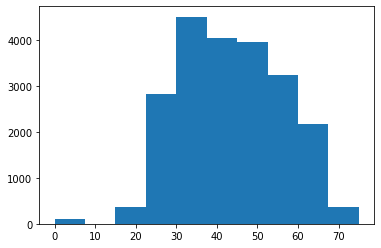

In [40]:
plt.hist(df['dob_years'])
plt.show()

[Decide qué harás con los valores problemáticos y explica por qué.]
Se encontraron algunos clientes con edad "0" años. Es un error. Tal vez no ingresaron la edad.

In [41]:
# Resuelve los problemas en la columna `dob_years`, si existen
df['dob_years'].mean()

43.29337979094077

In [42]:
df['dob_years'].replace(0, 43, inplace=True)

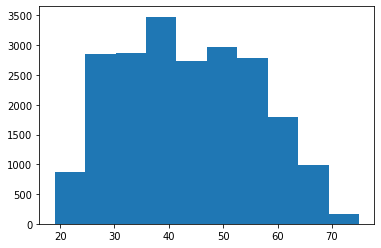

43.49514518002323

In [43]:
# Comprueba el resultado - asegúrate de que esté arreglado
plt.hist(df['dob_years'])
plt.show()

df['dob_years'].mean()

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Genial, buen trabajo con esta variable
</div>

<div class="alert alert-block alert-danger">

<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Necesita correcion. 
    
Las importaciones de librerias deben ir al comienzo del proyecto, revisa el comentario que te deje en esa seccion y corrige aqui tambien por favor
    
No hace falta importar las librerias para cada grafico, solo importalas una vez en la celda donde importates la libreria pandas
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor - 2da ITERACION</b> <a class="tocSkip"></a>

Buena correcion
</div>

[Ahora revisemos la columna `family_status`. Mira qué tipo de valores hay y qué problemas puedes tener que abordar.]

In [44]:
# Veamos los valores de la columna
df.groupby(['family_status', 'family_status_id']).count()

,,children,days_employed,dob_years,education,education_id,gender,income_type,debt,total_income,purpose,age_group_dob_years
family_status,family_status_id,,,,,,,,,,,
civil partnership,1,4177,3735,4177,4177,4177,4177,4177,4177,3735,4177,4177
divorced,3,1195,1083,1195,1195,1195,1195,1195,1195,1083,1195,1195
married,0,12380,11143,12380,12380,12380,12380,12380,12380,11143,12380,12380
unmarried,4,2813,2525,2813,2813,2813,2813,2813,2813,2525,2813,2813
widow / widower,2,960,865,960,960,960,960,960,960,865,960,960


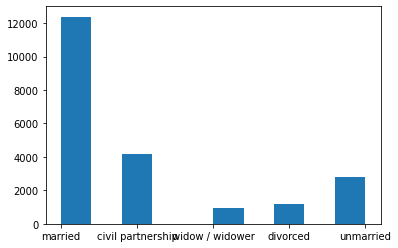

In [45]:
plt.hist(df['family_status'])
plt.show()

En la columna 'family_status' tenemos datos tipo object. Por lo tanto, es un tipo de dato adecuado para cadenas de texto como los datos guardados en esta columna. Además, se verificó que la codificación de la columna 'family_status_id' es consistente.

No se encontraron valores problematicos en la columna `family_status`.

[Ahora revisemos la columna `gender`. Mira qué tipo de valores hay y qué problemas puedes tener que abordar]

In [46]:
df.groupby(['gender']).count()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,income_type,debt,total_income,purpose,age_group_dob_years
gender,,,,,,,,,,,,
F,14236,12752,14236,14236,14236,14236,14236,14236,14236,12752,14236,14236
M,7288,6598,7288,7288,7288,7288,7288,7288,7288,6598,7288,7288
XNA,1,1,1,1,1,1,1,1,1,1,1,1


In [47]:
df.loc[df['gender'] == 'XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group_dob_years
10701,0,2358.600502,24,some college,2,civil partnership,1,XNA,business,0,32624.825,buy real estate,19-29


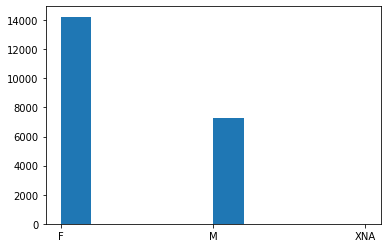

In [48]:
# Veamos los valores en la columna
plt.hist(df['gender'])
plt.show()

In [49]:
# Aborda los valores problemáticos, si existen
df['gender'] = df['gender'].replace('XNA', 'F')

In [50]:
# Comprueba el resultado - asegúrate de que esté arreglado
df['gender'].unique()

array(['F', 'M'], dtype=object)

Encontramos un único valor en la columna 'gender' igual a "XNA". Dado que no es un valor representantivo lo modifiqué por el tipo de genero con mayores datos "F".

<div class="alert alert-block alert-warning">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

En esta variable, reemplazar XNA por F es algo sesgado pero no esta del todo mal. 
    
Otra opcion era dejar el dato tal cual vino
</div>

[Ahora vamos a revisar la columna `income_type`. Mira qué tipo de valores hay y qué problemas puedes tener que abordar]

In [51]:
# Veamos los valores en la columna
df['income_type'].unique()

array(['employee', 'retiree', 'business', 'civil servant', 'unemployed',
       'entrepreneur', 'student', 'paternity / maternity leave'],
      dtype=object)

In [52]:
df.groupby('income_type')['days_employed'].count()

income_type
business                        4577
civil servant                   1312
employee                       10014
entrepreneur                       1
paternity / maternity leave        1
retiree                         3443
student                            1
unemployed                         2
Name: days_employed, dtype: int64

Las categorias 'entrepreneur', 'paternity / maternity leave', 'student' y 'unemployed', tienen tan solo 5 filas del total de los datos. Por lo tanto, no tienen peso. Al analizarlos, se podrían agregar en otras categorias.

In [53]:
# Aborda los valores problemáticos, si existen

df['income_type'] = df['income_type'].replace('entrepreneur', 'business')
df['income_type'] = df['income_type'].replace('paternity / maternity leave', 'employee')
df['income_type'] = df['income_type'].replace('student', 'employee')
df['income_type'] = df['income_type'].replace('unemployed', 'retiree')


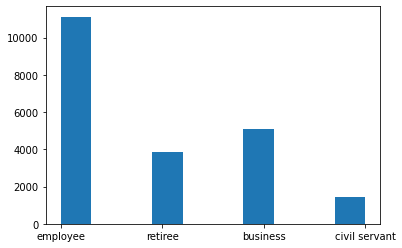

In [54]:
# Comprueba el resultado - asegúrate de que esté arreglado
plt.hist(df['income_type'])
plt.show()

[Ahora veamos si hay duplicados en nuestros datos. Si los hay, tendrás que decidir qué harás con ellos y explicar por qué.]

In [55]:
# Comprobar los duplicados
df.loc[df.duplicated()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group_dob_years
2849,0,NaN,41,secondary education,1,married,0,F,employee,0,NaN,purchase of the house for my family,40-50
3290,0,NaN,58,secondary education,1,civil partnership,1,F,retiree,0,NaN,to have a wedding,50-60
4182,1,NaN,34,bachelor's degree,0,civil partnership,1,F,employee,0,NaN,wedding ceremony,30-40
4851,0,NaN,60,secondary education,1,civil partnership,1,F,retiree,0,NaN,wedding ceremony,50-60
5557,0,NaN,58,secondary education,1,civil partnership,1,F,retiree,0,NaN,to have a wedding,50-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20702,0,NaN,64,secondary education,1,married,0,F,retiree,0,NaN,supplementary education,60-73
21032,0,NaN,60,secondary education,1,married,0,F,retiree,0,NaN,to become educated,50-60
21132,0,NaN,47,secondary education,1,married,0,F,employee,0,NaN,housing renovation,40-50
21281,1,NaN,30,bachelor's degree,0,married,0,F,employee,0,NaN,buy commercial real estate,30-40


In [56]:
# Aborda los duplicados, si existen

df = df.drop_duplicates().reset_index(drop=True)

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Genial, buen trabajo identificando y deciendo eliminar los duplicados
</div>

<div class="alert alert-block alert-danger">

<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Necesita correcion.
    
El modo en que los eliminaste no esta del todo bien.
    
Te invito a que imprimas las primeras filas del data frame ahora y veras a lo que me refiero
    
Para solucionarlo, al metodo reset_index seteale el argumento drop en TRUE
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor - 2da ITERACION</b> <a class="tocSkip"></a>

Buena correcion
</div>

In [57]:
df.tail()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group_dob_years
21449,1,4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,40-50
21450,0,14330.725172,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car,60-73
21451,1,2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,30-40
21452,3,3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,30-40
21453,2,1984.507589,40,secondary education,1,married,0,F,employee,0,13127.587,to buy a car,30-40


In [58]:
# Última comprobación para ver si tenemos duplicados
df.loc[df.duplicated()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group_dob_years


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21454 entries, 0 to 21453
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   children             21454 non-null  int64  
 1   days_employed        19351 non-null  float64
 2   dob_years            21454 non-null  int64  
 3   education            21454 non-null  object 
 4   education_id         21454 non-null  int64  
 5   family_status        21454 non-null  object 
 6   family_status_id     21454 non-null  int64  
 7   gender               21454 non-null  object 
 8   income_type          21454 non-null  object 
 9   debt                 21454 non-null  int64  
 10  total_income         19351 non-null  float64
 11  purpose              21454 non-null  object 
 12  age_group_dob_years  21454 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.1+ MB


[Describe tu nuevo conjunto de datos: di brevemente qué has cambiado y cuál es el porcentaje de cambios, si hubo alguno.]

1. Hemos modificado duplicados implicitos en la columna 'education"
2. Hemos reemplazo algunos valores que no tenian sentido en la columna "children"
3. Hemos modificado los valores negativos de la columna "days_employed" a positivos y hemos dividido valores que estan al parecen en horas para que se muestren en días.
4. Hemos reemplazo los valores "0" en 'dob_years' por el promedio de la columna.
5. Hemos modificado 5 filas en la categorias de la columna 'gender' y las hemos agregado a las categorias más participativas.
6. Hemos modificado algunas filas en la categorias de la columna 'income_type' y las hemos agregado a las categorias más participativas.
7. Hemos eliminado filas duplicadas.


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Genial Jhon hiciste un muy buen trabajo en esta primera parte 
</div>

<div class="alert alert-block alert-danger">

<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Revisa las correciones necesarias para mejorarlo aun mas.
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor - 2da ITERACION</b> <a class="tocSkip"></a>

Buenas correciones, el proyecto esta muy bien
</div>

# Trabajar con valores ausentes

[Para acelerar el trabajo con algunos datos, puede que necesites trabajar con diccionarios para algunos valores, en los que se proporcionan IDs. Explica por qué y con qué diccionarios vas a trabajar.]

Vamos crear dos diccionarios para las columnas en las que se nos han proporcionado IDs. Los diccionarios nos ayudaran a trabajar de mejor forma y orden con estos datos.

In [60]:
# Encuentra los diccionarios
education_dict = {0:"bachelor's degree",
                  1:"secondary education",
                  2:"some college",
                  3:"primary education",
                  4:"graduate degree"
                    }
education_dict

{0: "bachelor's degree",
 1: 'secondary education',
 2: 'some college',
 3: 'primary education',
 4: 'graduate degree'}

In [61]:
family_status_dict = {0:"married",
                  1:"civil partnership",
                  2:"widow / widower",
                  3:"divorced",
                  4:"unmarried"
                    }
family_status_dict

{0: 'married',
 1: 'civil partnership',
 2: 'widow / widower',
 3: 'divorced',
 4: 'unmarried'}

### Restaurar valores ausentes en `total_income`

[Indica brevemente qué columnas tienen valores ausentes que debes abordar. Explica cómo las arreglarás.]

Hay valores ausentes en las columnas "days_employed" e "income_type".

Cómo lo habiamos explicado anteriormente, dado que el porcentaje de valores ausentes sobre el total de filas es mayor a un 10% sería mejor rellenar los valores ausentes con la media o mediana.

[Empieza por abordar los valores ausentes del ingreso total. Crea una categoría de edad para los clientes. Crea una nueva columna con la categoría de edad. Esta estrategia puede ayudar a calcular valores para el ingreso total.]


In [62]:
# Vamos a escribir una función que calcule la categoría de edad

def age_group(dob_years):
    try:
        if dob_years <= 18:
            return '0-18'
        if dob_years <= 29:
            return '19-29'
        if dob_years <= 40:
            return '30-40'
        if dob_years <= 50:
            return '40-50'
        if dob_years <= 60:
            return '50-60'
        return '60-73'
    except:
        return 'fuera de rango'

In [63]:
# Prueba si la función funciona bien

print(age_group(10))
print(age_group(25))
print(age_group(35))
print(age_group(45))
print(age_group(55))
print(age_group(65))

0-18
19-29
30-40
40-50
50-60
60-73


In [64]:
# Crear una nueva columna basada en la función

df['age_group_dob_years'] = df['dob_years'].apply(age_group)

In [65]:
# Comprobar cómo los valores en la nueva columna

df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group_dob_years
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,40-50
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,30-40
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,30-40
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,30-40
4,0,14177.753002,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,50-60


[Piensa en los factores de los que suelen depender los ingresos. Eventualmente, tendrás que averiguar si debes usar valores medios o medianos para reemplazar los valores ausentes. Para tomar esta decisión, probablemente querrás ver la distribución de los factores que, según tu análisis, pueden tener un impacto en los ingresos de uno.]

[Crea una tabla que solo tenga datos sin valores ausentes. Estos datos se utilizarán para restaurar los valores ausentes.]

In [66]:
# Crea una tabla sin valores ausentes y muestra algunas de sus filas para asegurarte de que se ve bien

df = df[df.days_employed.isna() == False]

In [67]:
# Examina los valores medios de los ingresos en función de los factores que identificaste

df['total_income'].mean()

26787.568354658673

In [68]:
# Examina los valores medianos de los ingresos en función de los factores que identificaste
df['total_income'].median()

23202.87

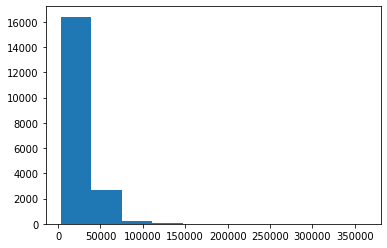

In [69]:
plt.hist(df['total_income'])
plt.show()

[Repite tales comparaciones para múltiples factores. Asegúrate de considerar diferentes aspectos y explica tu razonamiento.]



[Determina qué características definen mejor los ingresos y decide si utilizarás una mediana o una media. Explica por qué tomaste esta decisión.]


In [70]:
#  Escribe una función que usaremos para completar los valores ausentes
        
def fill_null_values(null_value):
        if null_value != 0:
            return df['total_income'].mean()

In [71]:
# Comprueba si funciona
fill_null_values(1)

26787.568354658673

In [72]:
# Aplícalo a cada fila
df.loc[df['total_income'].isna(), 'total_income'] = df.loc[df['total_income'].isna(), 'total_income'].apply(fill_null_values)

In [73]:
# Comprueba si tenemos algún error
df[df.total_income.isna() == True]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group_dob_years


[Si has encontrado errores al preparar los valores para los datos ausentes, probablemente signifique que hay algo especial en los datos de la categoría. Piénsalo un poco: tal vez hará falta arreglar algunas cosas manualmente, si hay suficientes datos para encontrar medianas/medias.]


In [74]:
# Reemplazar los valores ausentes si hay algún error

# No encontré otros errores.

[Cuando creas que has terminado con `total_income`, comprueba que el número total de valores en esta columna coincida con el número de valores en otras columnas.]

In [75]:
# Comprobar el número de entradas en las columnas
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,19351.000000,19351.000000,19351.000000,19351.000000,19351.000000,19351.000000,19351.000000
mean,0.479613,4641.641176,43.457547,0.819079,0.972249,0.081184,26787.568355
std,0.753895,5355.964289,12.222758,0.550104,1.420596,0.273125,16475.450632
min,0.000000,24.141633,19.000000,0.000000,0.000000,0.000000,3306.762000
25%,0.000000,927.009265,33.000000,1.000000,0.000000,0.000000,16488.504500
50%,0.000000,2194.220567,43.000000,1.000000,0.000000,0.000000,23202.870000
75%,1.000000,5537.882441,53.000000,1.000000,1.000000,0.000000,32549.611000
max,5.000000,18388.949901,75.000000,4.000000,4.000000,1.000000,362496.645000


###  Restaurar valores en `days_employed`

[Piensa en los parámetros que pueden ayudarte a restaurar los valores ausentes en esta columna. Eventualmente, tendrás que averiguar si debes usar valores medios o medianos para reemplazar los valores ausentes. Probablemente llevarás a cabo una investigación similar a la que realizaste cuando restauraste los datos en la columna anterior.]

In [76]:
# Distribución de las medianas de `days_employed` en función de los parámetros identificados
df['days_employed'].mean()

4641.641176180656

In [77]:
# Distribución de las medias de `days_employed` en función de los parámetros identificados
df['days_employed'].median()

2194.220566878695

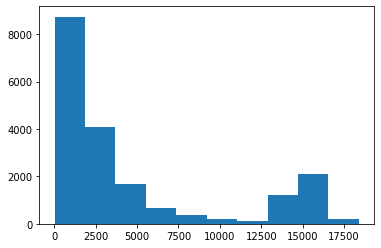

In [78]:
plt.hist(df['days_employed'])
plt.show()

[Decide qué vas a utilizar: medias o medianas. Explica por qué.]

Usaré la mediana porque los datos estan uniformemente distribuidos.

In [79]:
# Escribamos una función que calcule medias o medianas (dependiendo de tu decisión) según el parámetro identificado
def fill_null_values_2 (null_value):
        if null_value != 0:
            return df['days_employed'].median()

In [80]:
# Comprueba que la función funciona

fill_null_values_2(1)

2194.220566878695

In [81]:
# Aplicar la función al income_type
df.loc[df['income_type'].isna(), 'income_type'] = df.loc[df['income_type'].isna(), 'income_type'].apply(fill_null_values_2, axis=0)

In [82]:
# Comprueba si la función funcionó
df[df.income_type.isna() == True]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group_dob_years


In [83]:
# Reemplazar valores ausentes

df.loc[df['days_employed'].isna(), 'days_employed'] = df.loc[df['days_employed'].isna(), 'days_employed'].apply(fill_null_values_2)

[Cuando creas que has terminado con `total_income`, comprueba que el número total de valores en esta columna coincida con el número de valores en otras columnas.]

In [84]:
# Comprueba las entradas en todas las columnas: asegúrate de que hayamos corregido todos los valores ausentes
df.isna().sum()

children               0
days_employed          0
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income           0
purpose                0
age_group_dob_years    0
dtype: int64

## Clasificación de datos

[Para poder responder a las preguntas y probar las diferentes hipótesis, querrás trabajar con datos clasificados. Mira las preguntas formuladas que debes responder. Piensa qué parte de los datos tiene que ser clasificada para responder a estas preguntas. A continuación, encontrarás una plantilla a través de la cual puedes trabajar para clasificar los datos. El primer procesamiento paso a paso cubre los datos de texto; el segundo aborda los datos numéricos que necesitan ser clasificados. Puedes usar ambas o ninguna de las instrucciones sugeridas, eso solo depende de ti.]

[Independientemente de cómo decidas abordar la clasificación, asegúrate de proporcionar una explicación clara de la razón por la que tomaste tu decisión. Recuerda: este es tu trabajo y aquí tú tomas todas las decisiones.]


## Muestra los valores de los datos seleccionados para la clasificación

[¿Hay alguna conexión entre tener hijos y pagar un préstamo a tiempo?
    
    children y debt
    
¿Existe una conexión entre el estado civil y el pago a tiempo de un préstamo?
    
    family_status y debt
    
¿Existe una conexión entre el nivel de ingresos y el pago a tiempo de un préstamo?
    
    total_income y debt
    
¿Cómo afectan los diferentes propósitos del préstamo al reembolso a tiempo del préstamo?
    
    purpose y debt]

[Vamos a comprobar los valores únicos]

In [85]:
df["children"].value_counts()

0    12710
1     4387
2     1918
3      294
4       34
5        8
Name: children, dtype: int64

In [86]:
df["family_status"].value_counts()

married              11143
civil partnership     3735
unmarried             2525
divorced              1083
widow / widower        865
Name: family_status, dtype: int64

In [87]:
df["purpose"].value_counts()

wedding ceremony                            721
to have a wedding                           693
having a wedding                            685
real estate transactions                    615
buy commercial real estate                  597
purchase of the house                       595
buying property for renting out             588
housing                                     587
transactions with commercial real estate    581
building a real estate                      580
housing transactions                        579
purchase of my own house                    574
property                                    572
purchase of the house for my family         570
building a property                         561
construction of own property                560
transactions with my real estate            559
buy real estate                             552
buy residential real estate                 546
housing renovation                          542
car                                     

[¿Qué grupos principales puedes identificar en función de los valores únicos?]

Los temas principales del proposito del prestamos se categorizan así:
1. "wedding" 
{"wedding ceremony", "having a wedding", "to have a wedding"}
2. "real estate" 
{"real estate transactions", "buy commercial real estate", "housing transactions", "buying property for renting out", "transactions with commercial real estate", "purchase of the house", "housing", "purchase of the house for my family", "construction of own property", "property", "transactions with my real estate", "building a real estate", "buy real estate", "purchase of my own house", "building a property", "housing renovation", "buy residential real estate"}
3. "car investment" 
{"buying my own car", "car", "second-hand car purchase", "cars", "to own a car", "buying a second-hand car", "to buy a car", "car purchase"}
4. "studies" 
{"going to university", "supplementary education", "purchase of a car", "university education", "education", "to get a supplementary education", "getting an education", "profile education", "getting higher education", "to become educated"}


[Según estos temas, probablemente querremos clasificar nuestros datos.]


In [88]:
# Escribamos una función para clasificar los datos en función de temas comunes

wedding = ["wedding ceremony", "having a wedding", "to have a wedding"]
real_estate = ["real estate transactions", "buy commercial real estate", "housing transactions", "buying property for renting out", "transactions with commercial real estate", "purchase of the house", "housing", "purchase of the house for my family", "construction of own property", "property", "transactions with my real estate", "building a real estate", "buy real estate", "purchase of my own house", "building a property", "housing renovation", "buy residential real estate"]
car_investment = ["buying my own car", "car", "second-hand car purchase", "cars", "to own a car", "buying a second-hand car", "to buy a car", "car purchase"]
studies = ["going to university", "supplementary education", "purchase of a car", "university education", "education", "to get a supplementary education", "getting an education", "profile education", "getting higher education", "to become educated"]

def group_purpose(value_purpose):
        
    if value_purpose in wedding:
        return "wedding"
    elif value_purpose in real_estate:
        return "real estate"
    elif value_purpose in car_investment:
        return "car investment"
    elif value_purpose in studies:
        return "studies"
    else:        
        return "error, revisar"
    #value_purpose == "going to university"or "supplementary education"or "purchase of a car"or "university education"or "education"or "to get a supplementary education"or "getting an education"or "profile education"or "getting higher education"or "to become educated":
     #   return "studies"
    
group_purpose("going to university")

'studies'

In [89]:
# Crea una columna con las categorías y cuenta los valores en ellas

df["group_purpose"] = df['purpose'].apply(group_purpose)

df.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group_dob_years,group_purpose
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,40-50,real estate
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,30-40,car investment
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,30-40,real estate
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,30-40,studies
4,0,14177.753002,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,50-60,wedding


[Si decides clasificar los datos numéricos, también tendrás que crear las categorías para ello.]

In [90]:
# Revisar todos los datos numéricos en la columna seleccionada para la clasificación

df["total_income"]

0        40620.102
1        17932.802
2        23341.752
3        42820.568
4        25378.572
           ...    
21449    35966.698
21450    24959.969
21451    14347.610
21452    39054.888
21453    13127.587
Name: total_income, Length: 19351, dtype: float64

In [91]:
# Obtener estadísticas resumidas para la columna

df["total_income"].describe()

count     19351.000000
mean      26787.568355
std       16475.450632
min        3306.762000
25%       16488.504500
50%       23202.870000
75%       32549.611000
max      362496.645000
Name: total_income, dtype: float64

[Decide qué rangos utilizarás para agrupar y explica por qué.]

In [92]:
# Crear una función para clasificar en diferentes grupos numéricos basándose en rangos

def group_total_income(value_total_income):
        
    if value_total_income <= 17220:
        return "0-17220"
    elif value_total_income <= 25000:
        return "17220-25000"
    elif value_total_income <= 31350:
        return "25000-31350"
    else:        
        return ">31350"

In [93]:
# Crear una columna con categorías

df["group_total_income"] = df['total_income'].apply(group_total_income)

df.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group_dob_years,group_purpose,group_total_income
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,40-50,real estate,>31350
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,30-40,car investment,17220-25000
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,30-40,real estate,17220-25000
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,30-40,studies,>31350
4,0,14177.753002,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,50-60,wedding,25000-31350


In [94]:
# Contar los valores de cada categoría para ver la distribución
df["group_total_income"].value_counts()

17220-25000    5384
0-17220        5364
>31350         5356
25000-31350    3247
Name: group_total_income, dtype: int64

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Genial, buen trabajo Jhon
</div>

## Comprobación de las hipótesis


**¿Existe una correlación entre tener hijos y pagar a tiempo?**

In [95]:
# Comprueba los datos sobre los hijos y los pagos puntuales

df.groupby(['children','debt',])['children'].count()

children  debt
0         0       11758
          1         952
1         0        3978
          1         409
2         0        1733
          1         185
3         0         272
          1          22
4         0          31
          1           3
5         0           8
Name: children, dtype: int64

In [96]:
# Calcular la tasa de incumplimiento en función del número de hijos

df.groupby('children')['debt'].mean().sort_values()

children
5    0.000000
3    0.074830
0    0.074902
4    0.088235
1    0.093230
2    0.096455
Name: debt, dtype: float64

**Conclusión**

La estadistica muestra que a mayor número de hijos mayor nivel de incumplimiento del pago de la deuda.

[Escribe tus conclusiones en base a tus manipulaciones y observaciones.]


**¿Existe una correlación entre la situación familiar y el pago a tiempo?**

In [97]:
# Comprueba los datos del estado familiar y los pagos a tiempo
df.groupby(['family_status','debt',])['family_status'].count()

family_status      debt
civil partnership  0        3396
                   1         339
divorced           0        1007
                   1          76
married            0       10297
                   1         846
unmarried          0        2271
                   1         254
widow / widower    0         809
                   1          56
Name: family_status, dtype: int64

In [98]:
# Calcular la tasa de incumplimiento basada en el estado familiar

df.groupby('family_status')['debt'].mean().sort_values()

family_status
widow / widower      0.064740
divorced             0.070175
married              0.075922
civil partnership    0.090763
unmarried            0.100594
Name: debt, dtype: float64

**Conclusión**

[Escribe tus conclusiones en base a tus manipulaciones y observaciones.]

No encontramos una correlación entre el estado familiar y la tasa de incumplimiento. No obstante, las personas solteras son las que tienen una mayor tasa de incumplimiento.

**¿Existe una correlación entre el nivel de ingresos y el pago a tiempo?**

In [99]:
# Comprueba los datos del nivel de ingresos y los pagos a tiempo

df.groupby(['group_total_income','debt',])['group_total_income'].count()

group_total_income  debt
0-17220             0       4937
                    1        427
17220-25000         0       4915
                    1        469
25000-31350         0       2955
                    1        292
>31350              0       4973
                    1        383
Name: group_total_income, dtype: int64

In [100]:
# Calcular la tasa de incumplimiento basada en el nivel de ingresos

df.groupby('group_total_income')['debt'].mean().sort_values()

group_total_income
>31350         0.071509
0-17220        0.079605
17220-25000    0.087110
25000-31350    0.089929
Name: debt, dtype: float64

**Conclusión**

[Escribe tus conclusiones en base a tus manipulaciones y observaciones.]

No se encontró una relación directa entre el nivel de ingresos y la taas de incumplimiento.

**¿Cómo afecta el propósito del crédito a la tasa de incumplimiento?**

In [101]:
# Consulta los porcentajes de tasa de incumplimiento para cada propósito del crédito y analízalos

df.groupby(['group_purpose','debt',])['group_purpose'].count()

group_purpose   debt
car investment  0       3166
                1        322
real estate     0       9043
                1        715
studies         0       3630
                1        376
wedding         0       1941
                1        158
Name: group_purpose, dtype: int64

In [102]:
df.groupby('group_purpose')['debt'].mean().sort_values()

group_purpose
real estate       0.073273
wedding           0.075274
car investment    0.092317
studies           0.093859
Name: debt, dtype: float64

In [103]:
df.groupby('education')['debt'].mean().sort_values()

education
graduate degree        0.000000
bachelor's degree      0.053435
secondary education    0.089535
some college           0.096296
primary education      0.107280
Name: debt, dtype: float64

In [104]:
df.groupby(['education','group_purpose'])['group_purpose'].count()

education            group_purpose 
bachelor's degree    car investment     857
                     real estate       2413
                     studies            911
                     wedding            535
graduate degree      real estate          5
                     studies              1
primary education    car investment      43
                     real estate        130
                     studies             62
                     wedding             26
secondary education  car investment    2470
                     real estate       6870
                     studies           2889
                     wedding           1464
some college         car investment     118
                     real estate        340
                     studies            143
                     wedding             74
Name: group_purpose, dtype: int64

**Conclusión**

[Escribe tus conclusiones en base a tus manipulaciones y observaciones.]

No se encontró una relación directa entre el próposito del prestamos y la taas de incumplimiento. No obstante, el proposito con mayor tasa de incumplimiento es el relacionado con estudios.

Los clientes con menos educación tienen claramente una mayor tasa de incumplimiento.

# Conclusión general 

[Enumera tus conclusiones en esta última sección. Asegúrate de incluir todas las conclusiones importantes que hiciste y que te llevaron a la forma en que procesaste y analizaste los datos. Habla de los valores ausentes, los duplicados y las posibles razones y soluciones para los artefactos problemáticos que tuviste que abordar.]

[Enumera tus conclusiones con respecto a las preguntas planteadas aquí también.]

1. Los clientes con mayor número de hijos tienen un mayor incumplimiento.
2. Los clientes menos educados tienen mayor nivel de incumplimiento.
3. Las personas que solictaron prestamos para estudios tienen mayor nivel de incumplimiento.
4. No hay relación entre los ingresos de los clientes y el incumplimiento.
5. No hay relación entre el estado civil y el incumplimiento.


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Genial, buen trabajo explorando los datos relacionados a las hipotesis planteadas
</div>

<div class="alert alert-block alert-danger">

<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Necesita correcion. 
    
Hiciste un trabajo muy bueno, solo te deje algunas minimas correcciones por hacer.
</div>

<div class="alert alert-block alert-info">
<b>Muchas gracias, Matias. Ahí realicé las correcciones que me indicaste.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor - 2da ITERACION</b> <a class="tocSkip"></a>

Buen trabajo Jhon, tu proyecto esta aprobado
</div>